In [39]:
import pandas as pd
import numpy as np
from  sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

path = kagglehub.dataset_download("nelgiriyewithana/credit-card-fraud-detection-dataset-2023")

print("Path to dataset files:", path)

/opt/anaconda3/envs/yt/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 143M/143M [00:18<00:00, 8.08MB/s] 

Extracting files...


Path to dataset files: /Users/dilshantharushika/.cache/kagglehub/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/versions/1


In [6]:
df = pd.read_csv("/Users/dilshantharushika/Desktop/fake_news gnn/creditcard_2023.csv")

In [7]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [8]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df["Class"].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [10]:
X = df.drop(["id", "Class"], axis=1, errors="ignore")
y = df["Class"]

In [11]:
print(X.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((454904, 29), (113726, 29), (454904,), (113726,))

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
print(pd.Series(y_train).value_counts(normalize = True))

Class
1    0.500334
0    0.499666
Name: proportion, dtype: float64


In [16]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    n_jobs=-1

)

In [17]:
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv = 5, scoring="f1")
print("\nCross Validation F1 scores: ", cv_scores)
print("Mean F1 score: ", np.mean(cv_scores))


Cross Validation F1 scores:  [0.98497161 0.9855437  0.98646155 0.98461744 0.98651968]
Mean F1 score:  0.9856227955680538


In [18]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_jobs=-1)

In [19]:
import joblib

joblib.dump(model, "rf_model.pkl")


['rf_model.pkl']

In [20]:
import joblib

In [21]:
model = joblib.load("rf_model.pkl")
y_pred = model.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     57015
           1       1.00      0.97      0.99     56711

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



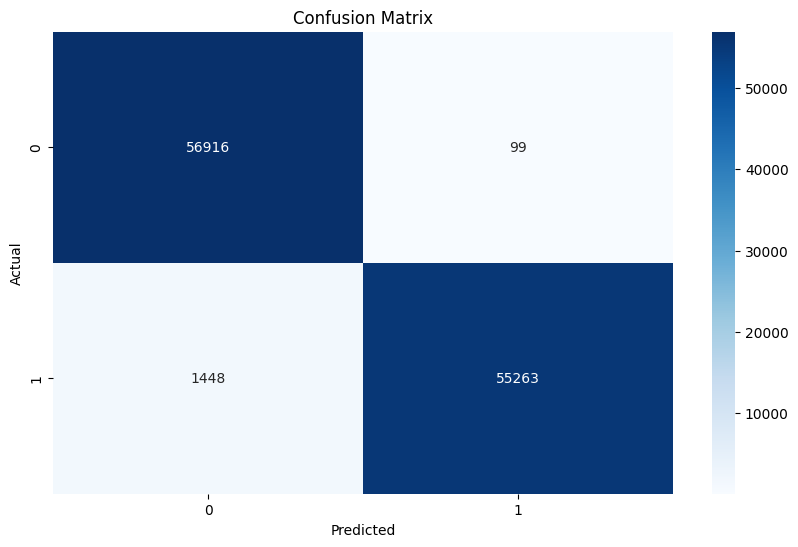

In [23]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= "d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
importance = model.feature_importances_
feature_imp = pd.DataFrame({"Feature": X.columns, "Importance": importance}).sort_values(by="Importance", ascending=False)


In [33]:
feature_imp.head()

,Feature,Importance
13,V14,0.220882
9,V10,0.133724
3,V4,0.133270
11,V12,0.112641
16,V17,0.081080


In [34]:
sorted_fi= feature_imp.sort_values(by="Importance", ascending=False)
print(sorted_fi)

   Feature  Importance
13     V14    0.220882
9      V10    0.133724
3       V4    0.133270
11     V12    0.112641
16     V17    0.081080
15     V16    0.065074
10     V11    0.051325
6       V7    0.040913
2       V3    0.039289
8       V9    0.018549
17     V18    0.014988
1       V2    0.008866
5       V6    0.008535
7       V8    0.008525
18     V19    0.008199
20     V21    0.007106
0       V1    0.006952
4       V5    0.005828
27     V28    0.005461
26     V27    0.005121
12     V13    0.004004
19     V20    0.003905
22     V23    0.003178
14     V15    0.003112
25     V26    0.002775
24     V25    0.002584
23     V24    0.002242
21     V22    0.001866
28  Amount    0.000006


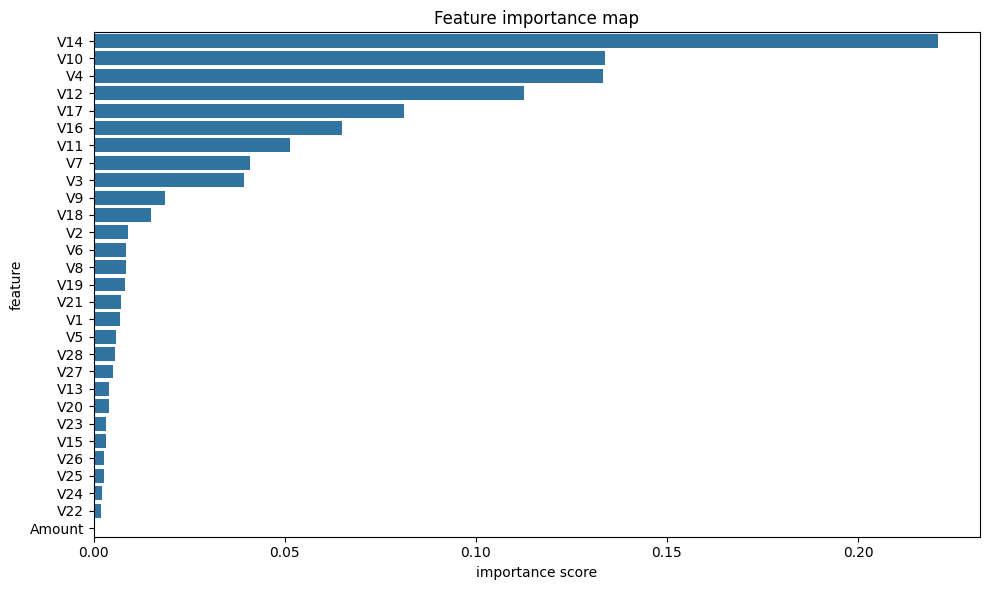

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(data = feature_imp, x = "Importance", y= "Feature")
plt.title("Feature importance map")
plt.xlabel("importance score")
plt.ylabel("feature")
plt.tight_layout()
plt.show()

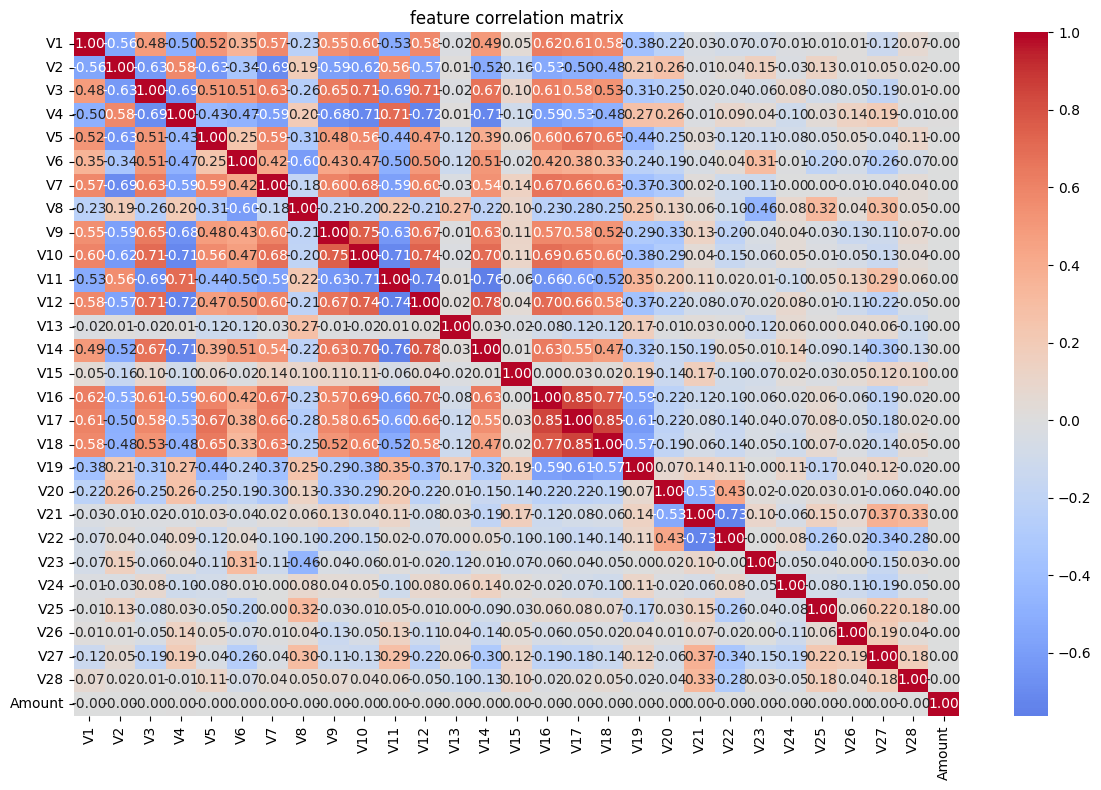

In [37]:
plt.figure(figsize=(12,8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("feature correlation matrix")
plt.tight_layout()
plt.show()

In [41]:
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

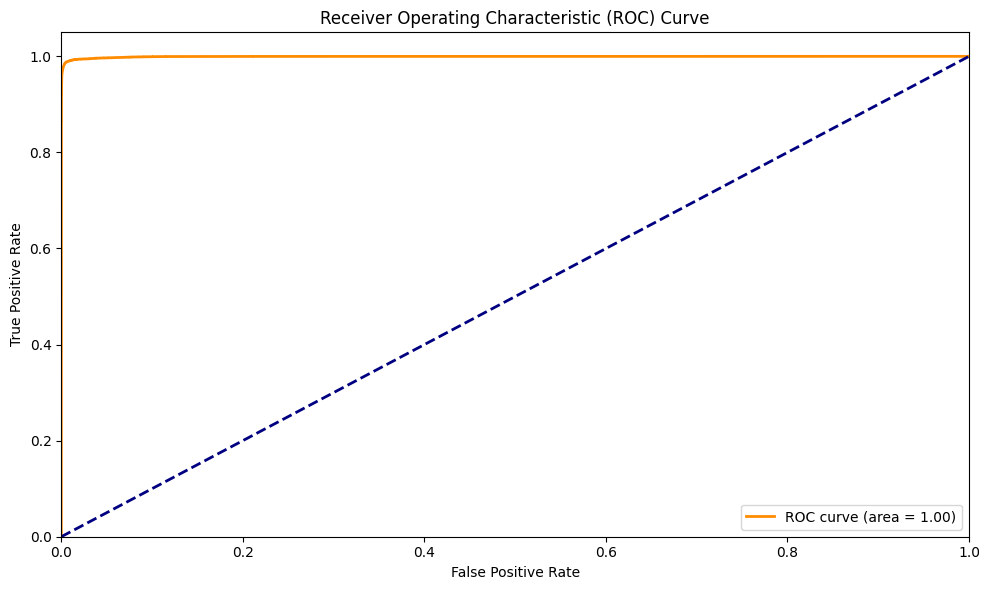

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color = "darkorange", lw=2, label = f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color = "navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()